# OSU Micro Benchmarks (IMB)

Results of selected latency and bandwidth tests from the [OMB suite](http://mvapich.cse.ohio-state.edu/benchmarks/).

All these tests use two nodes:

- osu_bw: Single process per node
- osu_latency: Single process per node
- osu_bibw (Bidirectional Bandwidth Test): Single process per node
- osu_mbw_mr (Multiple Bandwidth / Message Rate Test): Multiple processes per node, communicating in pairs split across nodes


In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Bandwidth/latency vs message size

The plots below show results vs message size for tests using a single process per node. Results are for the most-recent test on each system/partition/environment combination.

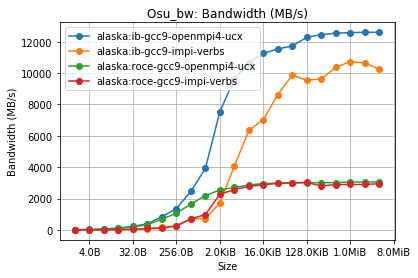

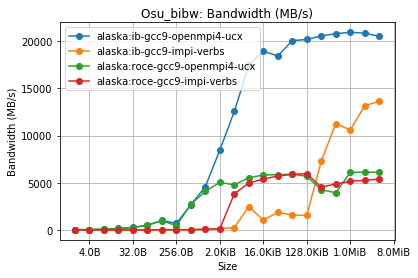

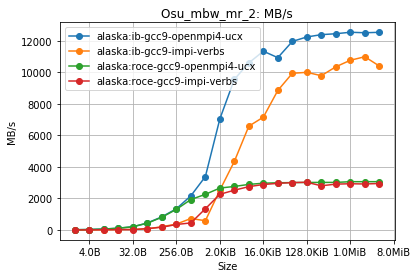

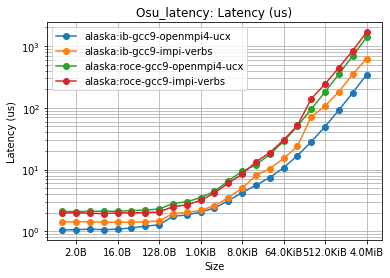

In [2]:
for test in ['Osu_bw', 'Osu_bibw', 'Osu_mbw_mr_2', 'Osu_latency']:
    
    # find all data and work out differences between them:
    paths = modules.utils.find_run_outputs(root='../../output', test=test)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    meta = [modules.utils.parse_path_metadata(p) for p in paths]
    
    # load and plot:
    for ix, path in enumerate(paths):
        data = modules.omb.read_omb_out(path)
        label = '%s:%s' % (meta[ix]['sysname'], meta[ix]['partition'])
        plt.plot(data.columns[0], data.columns[1], 'o-', data=data, label=label)
        
    # format plot:
    ax.set_xscale('log', basex=2)
    if 'latency' in test:
        ax.set_yscale('log', basey=10)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: modules.utils.sizeof_fmt(x)))
    ax.grid(True, which="both")
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    ax.set_title('%s: %s' % (test, data.columns[1]))
    ax.legend()

# Max Bandwidth/Message Rate vs Number of Processes per Node

The plots below show the **maximum** bandwidth and message rate for tests using varying numbers of processes per node. Results are for the most-recent test on each system/partition/environment combination.

max_bandwidth: Osu_mbw_mr_*


case,alaska:ib-gcc9-impi-verbs,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-impi-verbs,alaska:roce-gcc9-openmpi4-ucx
procs_per_node,,,,
1,10987.22,12542.14,3024.38,3062.72
2,12201.52,13133.12,3074.16,3063.33
4,12325.32,13114.05,3071.60,3063.42
8,12113.79,13180.94,3066.78,3063.55
16,12418.04,13207.87,3065.20,3063.60
32,12396.40,12943.48,3063.61,3063.59


max_message_rate: Osu_mbw_mr_*


case,alaska:ib-gcc9-impi-verbs,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-impi-verbs,alaska:roce-gcc9-openmpi4-ucx
procs_per_node,,,,
1,1595608.16,7.084505e+06,1375201.45,7023327.32
2,2920426.25,1.337220e+07,2816103.08,10470921.51
4,3851037.58,2.797063e+07,5070388.08,22920758.19
8,10462180.89,2.722189e+07,10676819.73,32537842.92
16,20566595.58,1.018432e+08,20561868.92,32819439.88
32,41115471.48,6.113097e+07,20839848.00,32866402.83


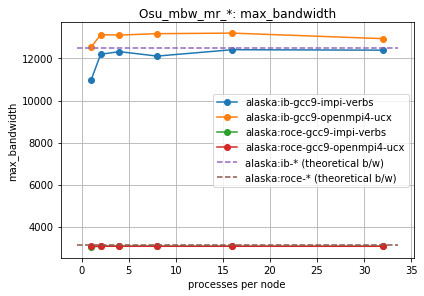

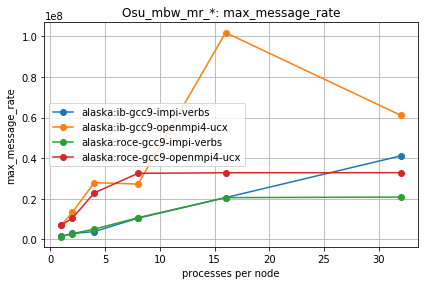

In [4]:
# TODO: needs to be loaded from system config somewhere
Gb_to_MB = 125.0

test = 'Osu_mbw_mr_*'
    
for perf_var in ['max_bandwidth', 'max_message_rate']:
    
    # get, plot and tabulate data:
    df = modules.utils.tabulate_last_perf(test, 'procs_per_node', perf_var)
    print('%s: %s' % (perf_var, test))
    display(HTML(df.to_html()))
    ax = df.plot(grid=True, style='o-')
    
    # add max bandwidth to relevant plots:
    if 'bandwidth' in perf_var:
        xlim = ax.get_xlim()
        for syspart, bw in modules.utils.get_sys_param('interconnect_Gb').items():
            theoretical_bw_MB = bw * Gb_to_MB
            label = syspart + " (theoretical b/w)"
            ax.plot(xlim, [theoretical_bw_MB, theoretical_bw_MB], '--', label=label)
    # format:
    ax.set_xlabel('processes per node')
    ax.set_ylabel(perf_var)
    plt.tight_layout()
    ax.set_title('%s: %s' % (test, perf_var))
    ax.legend()
